# SENTIMENT ANALYSIS FOR ENHANCING E-COMMERCE MARKETING USING DEEP LEARNING TECHNIQUES

# Dataset Links
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset


https://www.kaggle.com/crowdflower/twitter-airline-sentiment

https://www.kaggle.com/surajkum1198/twitterdata

https://www.kaggle.com/seriousran/appletwittersentimenttexts


# Importing Required Libraries

In [ ]:
!pip install tweepy

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U plotly

     |████████████████████████████████| 23.9 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Visualization & Preparation

In [ ]:
ds1 = pd.read_csv('/content/drive/MyDrive/Colab/Data/Twitter_Data 2.csv')
# Output first five rows
ds1.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [ ]:
# Load Tweet dataset
ds2 = pd.read_csv('/content/drive/MyDrive/Colab/Data/apple-twitter-sentiment-texts.csv')
ds2 = ds2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
ds2['category'] = ds2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
# Output first five rows

ds2.head()

clean_text  category
0  Wow. Yall needa step it up @Apple RT @heynyla:...      -1.0
1  What Happened To Apple Inc?   http://t.co/FJEX...       0.0
2  Thank u @apple I can now compile all of the pi...       1.0
3  The oddly uplifting story of the Apple co-foun...       0.0
4  @apple can i exchange my iphone for a differen...       0.0

In [ ]:
# Load Tweet dataset
ds3 = pd.read_csv('/content/drive/MyDrive/Colab/Data/finalSentimentdata2.csv')
ds3 = ds3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
ds3['category'] = ds3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
ds3 = ds3.drop(['Unnamed: 0'], axis=1)
# Output first five rows
ds3.head()

category                                         clean_text
0      -1.0  agree the poor in india are treated badly thei...
1       1.0  if only i could have spent the with this cutie...
2       1.0  will nature conservation remain a priority in ...
3      -1.0  coronavirus disappearing in italy show this to...
4      -1.0  uk records lowest daily virus death toll since...

In [ ]:
# Load Tweet dataset
ds4 = pd.read_csv('/content/drive/MyDrive/Colab/Data/Tweets.csv')
ds4 = ds4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
ds4['category'] = ds4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
ds4 = ds4[['category','clean_text']]
# Output first five rows
ds4.head()

category                                         clean_text
0       0.0                @VirginAmerica What @dhepburn said.
1       1.0  @VirginAmerica plus you've added commercials t...
2       0.0  @VirginAmerica I didn't today... Must mean I n...
3      -1.0  @VirginAmerica it's really aggressive to blast...
4      -1.0  @VirginAmerica and it's a really big bad thing...

In [ ]:
ds = pd.concat([ds1, ds2, ds3, ds4], ignore_index=True)

In [ ]:
# Check for missing data
ds.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
# drop missing rows
ds.dropna(axis=0, inplace=True)

In [ ]:
ds.shape

(182329, 2)

In [ ]:
# Map tweet categories
ds['category'] = ds['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
ds.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

In [ ]:
# The distribution of sentiments
ds.groupby('category').count().plot(kind='bar')

In [ ]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in ds['clean_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

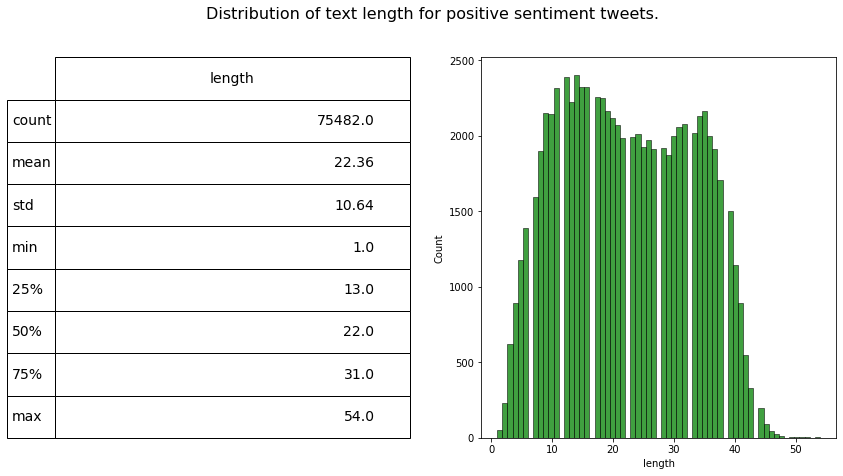

In [ ]:
fig = plt.figure(figsize=(14,7))
ds['length'] = ds.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(ds[ds['category']=='Positive']['length'], ax=ax1,color='green')
describe = ds.length[ds.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

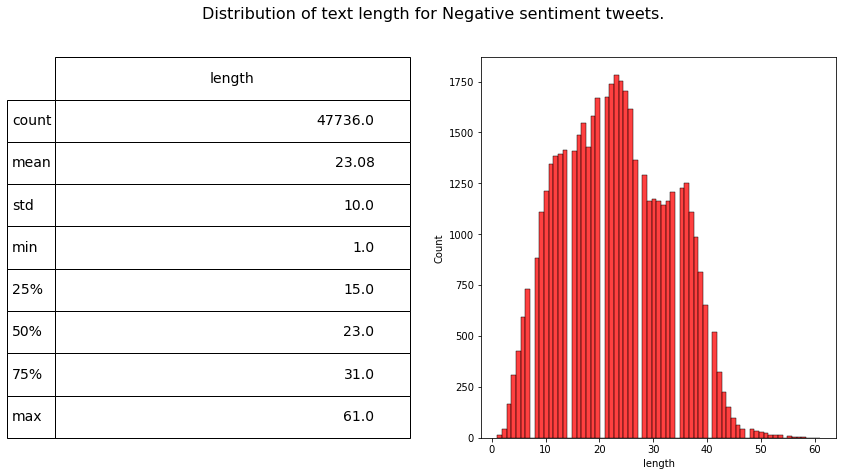

In [ ]:
fig = plt.figure(figsize=(14,7))
ds['length'] = ds.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(ds[ds['category']=='Negative']['length'], ax=ax1,color='red')
describe = ds.length[ds.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(ds, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
ds.drop(['length'], axis=1, inplace=True)
ds.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
182335  @AmericanAir thank you we got on a different f...  Positive
182336  @AmericanAir leaving over 20 minutes Late Flig...  Negative
182337  @AmericanAir Please bring American Airlines to...   Neutral
182338  @AmericanAir you have my money, you change my ...  Negative
182339  @AmericanAir we have 8 ppl so we need 2 know h...   Neutral

[182329 rows x 2 columns]>

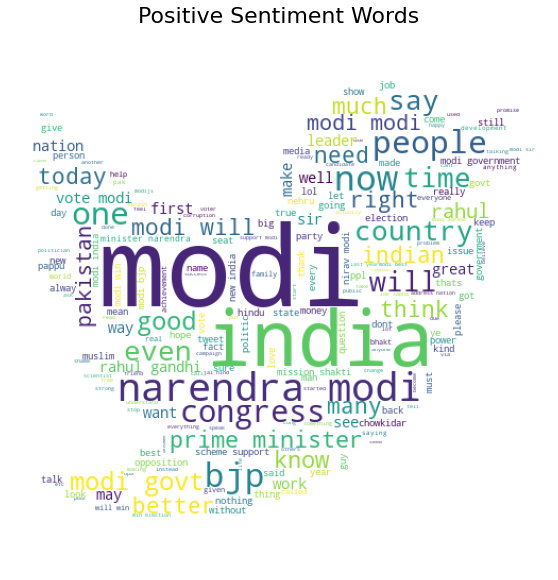

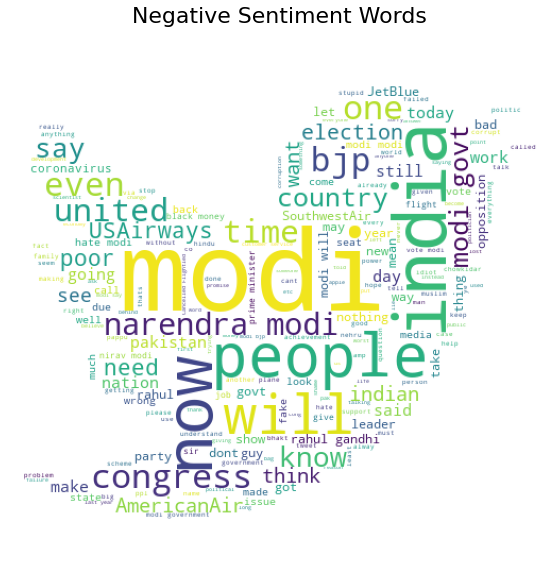

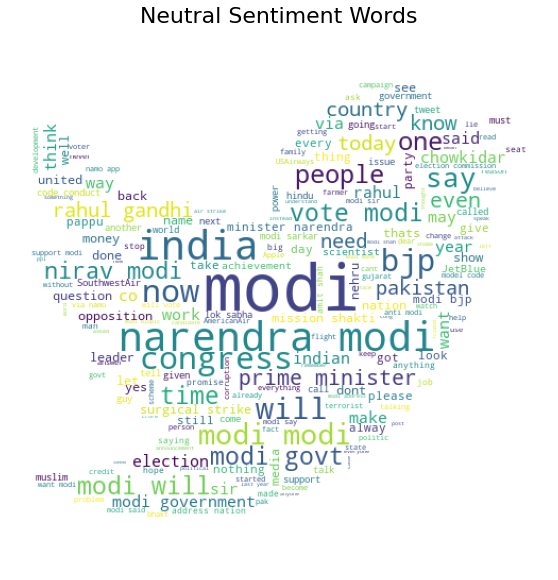

In [ ]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab/Data/twitter_mask3.jpg'))


#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(ds, category):
    '''
    Generating Word Cloud
    inputs:
       - ds: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in ds[ds.category==category]['clean_text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=200, 
                   mask=twitter_mask,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(18,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=22)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(ds, 'Positive')

# Negative tweet words
wordcount_gen(ds, 'Negative')

# Neutral tweet words
wordcount_gen(ds, 'Neutral')

# Data Pre Processing

Now we are going to engineering the data to make it easier for the model to clasiffy.

This section is very important to reduce the dimensions of the problem.

In [ ]:


def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", ds['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(ds['clean_text'][0]))




Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [ ]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, ds['clean_text']))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(ds['category'])

In [ ]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


In [ ]:
# Train Test Split

y = pd.get_dummies(ds['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vocabulary_size = 5000

# Applying count_vectorizer
count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['0', '000', '1', '10', '100', '1000', '10000', '10th', '11', '111', '1145', '11th', '12', '1200', '12000', '125', '12k', '130', '140', '14000', '15', '150', '1500', '1500000', '1520', '157200000', '15l', '15lac', '15lakh', '18', '180', '19', '1947', '1958', '1962', '1969', '1971', '1980', '1984', '1998', '1st', '2', '20', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2029', '21st', '23', '23rd', '24', '247', '24x7', '25', '250', '2611', '26th', '272', '27th', '280319', '282', '28th', '2cr', '2day', '2nd', '3', '30', '300', '3000', '30000', '300km', '31st', '350', '35a', '370', '3rd', '4', '40', '400', '4000', '45', '456', '4th', '5', '50', '500', '5000', '50000', '5th', '5year', '5yr', '6', '60', '600', '6000', '6th', '7', '72000', '7200000', '72k', '7th', '8', '80', '800', '8020', '9', '90', '9000', 'aa', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aalo', 'aam', 'aan', '

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', ds['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(ds['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  349   73 1911 1180   44 2465    2 1259  219    2  236   32
  165  102   53   55 1184  236   50    3    6  533    3   50 3833    3
 3077    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
y = pd.get_dummies(ds['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (109397, 50) (109397, 3)
Validation Set -> (36466, 50) (36466, 3)
Test Set -> (36466, 50) (36466, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Modelling

In [ ]:
# Import Required Modules

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.layers import Flatten
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

# Optimizer Settings

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Keras Tensorflow optimizers with Learning Rate = 0.1
rmsprop = RMSprop(learning_rate=learning_rate)
opt_adam = Adam(learning_rate=learning_rate)
opt_sgd = SGD(learning_rate=learning_rate)

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Custom settig on SGD Optimizer
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Modelling

## 1. CNN Model

In [ ]:
model_CNN = Sequential()
# Embedding Layer
model_CNN.add(Embedding(vocab_size, embedding_size, input_length=max_len))
# Convolution Layer
model_CNN.add(Conv1D(filters=32, 
                     kernel_size=3, 
                     padding='same', 
                     activation='relu'))
# Max Pooling layer 1x2 D
model_CNN.add(MaxPooling1D(pool_size=2))
# Dropout Layer
model_CNN.add(Dropout(0.4))
# Flatten Layer
model_CNN.add(Flatten())
# Fully Connected layer with the output of 3
model_CNN.add(Dense(3, activation='softmax'))

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2403      
Total params: 165,507
Trainable params: 165,507
Non-trainable params: 0
________________________________________________

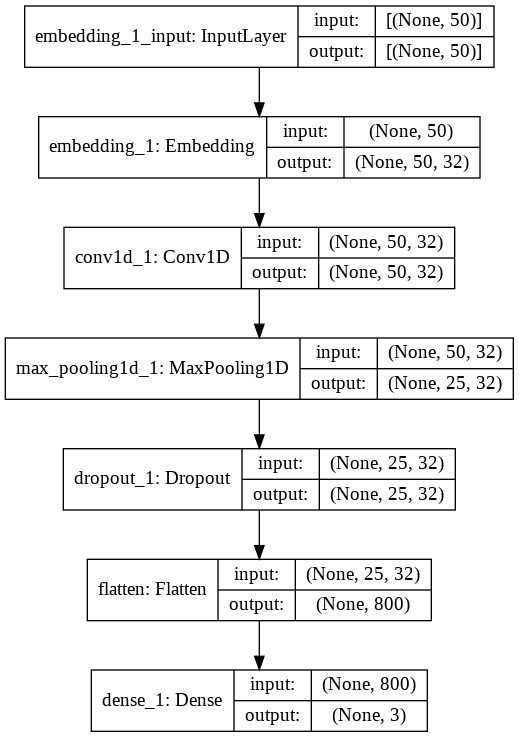

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_CNN, show_shapes=True)

In [ ]:
import math 
import time

Start = time.time()

# Compile model
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
CNN_history = model_CNN.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

Epoch 1/20
1710/1710 [==============================] - 45s 26ms/step - loss: 0.9885 - accuracy: 0.5125 - precision_2: 0.5981 - recall_2: 0.2617 - val_loss: 0.8795 - val_accuracy: 0.5981 - val_precision_2: 0.7053 - val_recall_2: 0.4219
Epoch 2/20
1710/1710 [==============================] - 43s 25ms/step - loss: 0.6359 - accuracy: 0.7541 - precision_2: 0.8133 - recall_2: 0.6666 - val_loss: 0.4870 - val_accuracy: 0.8207 - val_precision_2: 0.8393 - val_recall_2: 0.7984
Epoch 3/20
1710/1710 [==============================] - 43s 25ms/step - loss: 0.4177 - accuracy: 0.8661 - precision_2: 0.8810 - recall_2: 0.8462 - val_loss: 0.3659 - val_accuracy: 0.8948 - val_precision_2: 0.9053 - val_recall_2: 0.8814
Epoch 4/20
1710/1710 [==============================] - 41s 24ms/step - loss: 0.3601 - accuracy: 0.8921 - precision_2: 0.9010 - recall_2: 0.8806 - val_loss: 0.3233 - val_accuracy: 0.9096 - val_precision_2: 0.9158 - val_recall_2: 0.9016
Epoch 5/20
1710/1710 [==============================] - 

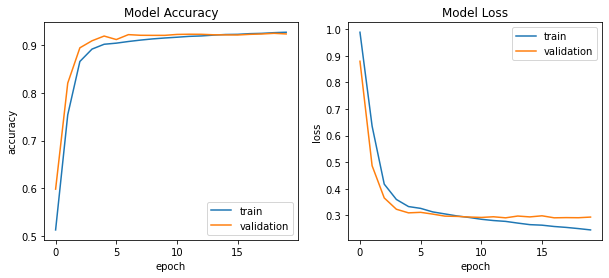

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(CNN_history.history['accuracy'])
    ax[0].plot(CNN_history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(CNN_history.history['loss'])
    ax[1].plot(CNN_history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(CNN_history)

## 2. LSTM

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, 
          momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model_lstm= Sequential()
model_lstm.add(Embedding(vocab_size, 
                         embedding_size, 
                         input_length=max_len))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 168,419
Trainable params: 168,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import math 
import time

Start = time.time()

# Compile model
model_lstm.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
lstm_history = model_lstm.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

Epoch 1/20
1710/1710 [==============================] - 58s 33ms/step - loss: 1.0646 - accuracy: 0.4361 - precision_4: 0.5295 - recall_4: 0.0630 - val_loss: 1.0175 - val_accuracy: 0.4897 - val_precision_4: 0.5530 - val_recall_4: 0.2694
Epoch 2/20
1710/1710 [==============================] - 56s 33ms/step - loss: 1.0107 - accuracy: 0.4934 - precision_4: 0.5634 - recall_4: 0.2373 - val_loss: 1.0035 - val_accuracy: 0.4967 - val_precision_4: 0.5644 - val_recall_4: 0.2866
Epoch 3/20
1710/1710 [==============================] - 56s 33ms/step - loss: 0.9850 - accuracy: 0.5128 - precision_4: 0.5772 - recall_4: 0.2820 - val_loss: 1.0573 - val_accuracy: 0.4927 - val_precision_4: 0.5097 - val_recall_4: 0.4376
Epoch 4/20
1710/1710 [==============================] - 55s 32ms/step - loss: 0.7859 - accuracy: 0.6488 - precision_4: 0.6983 - recall_4: 0.5620 - val_loss: 0.6598 - val_accuracy: 0.7371 - val_precision_4: 0.7487 - val_recall_4: 0.7182
Epoch 5/20
1710/1710 [==============================] - 

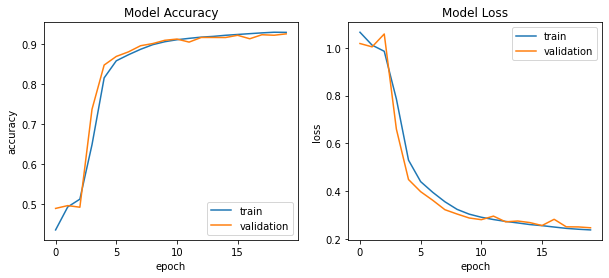

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(lstm_history.history['accuracy'])
    ax[0].plot(lstm_history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(lstm_history.history['loss'])
    ax[1].plot(lstm_history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

## 3. Bi Directional LSTM

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model_bi_lstm= Sequential()
# Embedding Layer
model_bi_lstm.add(Embedding(vocab_size, 
                            embedding_size, 
                            input_length=max_len))
# Bi-LSTM layer
model_bi_lstm.add(Bidirectional(LSTM(32)))
model_bi_lstm.add(Dropout(0.4))
model_bi_lstm.add(Dense(3, activation='softmax'))

model_bi_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 176,835
Trainable params: 176,835
Non-trainable params: 0
_________________________________________________________________


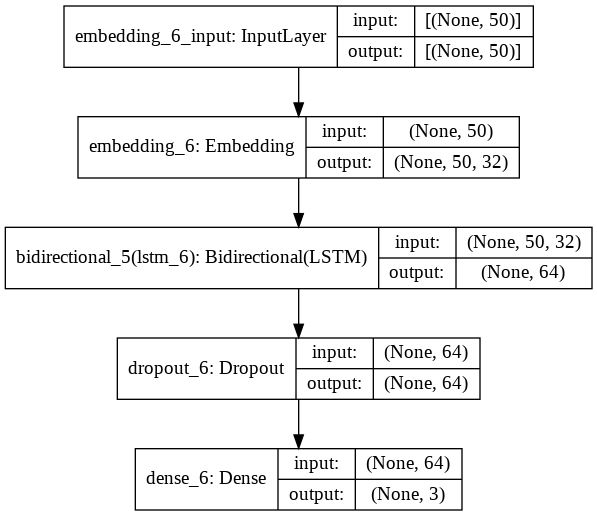

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_bi_lstm, show_shapes=True)

In [ ]:
import math 
import time

Start = time.time()

# Compile model
model_bi_lstm.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
bilstm_history = model_bi_lstm.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

Epoch 1/20
1710/1710 [==============================] - 184s 105ms/step - loss: 1.0035 - accuracy: 0.4962 - precision_5: 0.5735 - recall_5: 0.2128 - val_loss: 0.9565 - val_accuracy: 0.5418 - val_precision_5: 0.6041 - val_recall_5: 0.3490
Epoch 2/20
1710/1710 [==============================] - 177s 103ms/step - loss: 0.8754 - accuracy: 0.6001 - precision_5: 0.6755 - recall_5: 0.4396 - val_loss: 0.6520 - val_accuracy: 0.7389 - val_precision_5: 0.7853 - val_recall_5: 0.6710
Epoch 3/20
1710/1710 [==============================] - 184s 108ms/step - loss: 0.5616 - accuracy: 0.7928 - precision_5: 0.8179 - recall_5: 0.7595 - val_loss: 0.7087 - val_accuracy: 0.7336 - val_precision_5: 0.7502 - val_recall_5: 0.7132
Epoch 4/20
1710/1710 [==============================] - 134s 78ms/step - loss: 0.3845 - accuracy: 0.8763 - precision_5: 0.8840 - recall_5: 0.8676 - val_loss: 0.3908 - val_accuracy: 0.8671 - val_precision_5: 0.8711 - val_recall_5: 0.8618
Epoch 5/20
1710/1710 [===========================

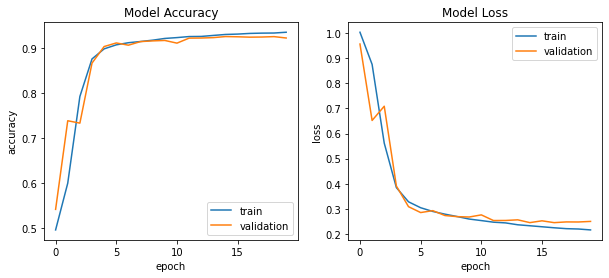

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(bilstm_history.history['accuracy'])
    ax[0].plot(bilstm_history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(bilstm_history.history['loss'])
    ax[1].plot(bilstm_history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(bilstm_history)

# 4 BiLSTM + CNN (Best Model)
It is also used for Testing.

In [ ]:

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

opt_sgd = SGD(learning_rate=learning_rate)
# Build model
model= Sequential()
# Embediing Layer
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
# Convolution Layer
model.add(Conv1D(filters=32, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))
# Pooling Layer
model.add(MaxPooling1D(pool_size=2))
# Bi-LSTM Layer
model.add(Bidirectional(LSTM(32)))
# Dropout Layer
model.add(Dropout(0.4))
# Fully Connected Layer
model.add(Dense(3, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

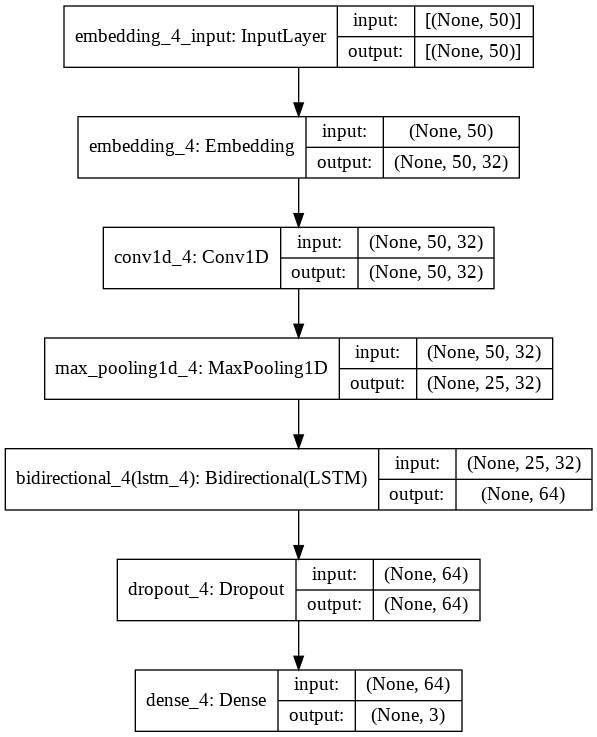

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 135s 77ms/step - loss: 1.0045 - accuracy: 0.4926 - precision_3: 0.5725 - recall_3: 0.2096 - val_loss: 0.9493 - val_accuracy: 0.5445 - val_precision_3: 0.6323 - val_recall_3: 0.2891
Epoch 2/20
1710/1710 [==============================] - 131s 77ms/step - loss: 0.7265 - accuracy: 0.6858 - precision_3: 0.7464 - recall_3: 0.5853 - val_loss: 0.5261 - val_accuracy: 0.8055 - val_precision_3: 0.8171 - val_recall_3: 0.7956
Epoch 3/20
1710/1710 [==============================] - 131s 77ms/step - loss: 0.3651 - accuracy: 0.8889 - precision_3: 0.8949 - recall_3: 0.8805 - val_loss: 0.3064 - val_accuracy: 0.9059 - val_precision_3: 0.9091 - val_recall_3: 0.9016
Epoch 4/20
1710/1710 [==============================] - 131s 76ms/step - loss: 0.3046 - accuracy: 0.9105 - precision_3: 0.9149 - recall_3: 0.9050 - val_loss: 0.2744 - val_accuracy: 0.9191 - val_precision_3: 0.9221 - val_recall_3: 0.9151
Epoch 5/20
1710/1710 [==============================

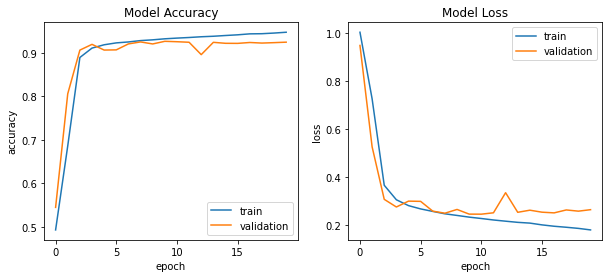

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9193
Precision : 0.9258
Recall    : 0.9132
F1 Score  : 0.9195


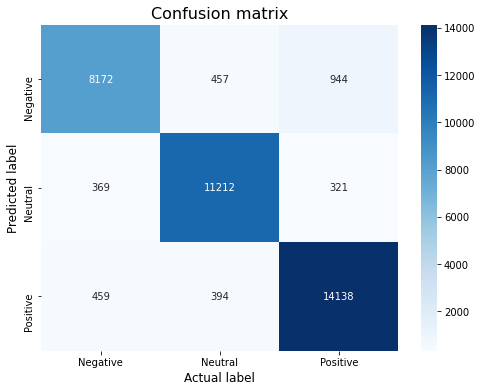

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Save the model architecture & the weights
model.save('best_model_jjsgd.h5')
print('Best model SGD saved')

Best model SGD saved


# Hyper Parameter Tuning

## RMSProp

In [ ]:

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

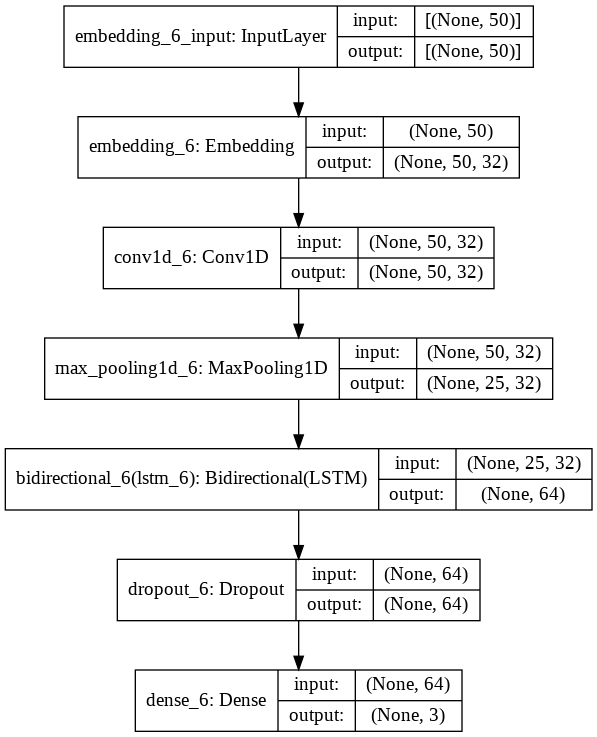

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 124s 70ms/step - loss: 1.2720 - accuracy: 0.3751 - precision_4: 0.3902 - recall_4: 0.2527 - val_loss: 1.3133 - val_accuracy: 0.4418 - val_precision_4: 0.4418 - val_recall_4: 0.4418
Epoch 2/20
1710/1710 [==============================] - 114s 67ms/step - loss: 1.2664 - accuracy: 0.3806 - precision_4: 0.3954 - recall_4: 0.2688 - val_loss: 1.1076 - val_accuracy: 0.3675 - val_precision_4: 0.7331 - val_recall_4: 0.0381
Epoch 3/20
1710/1710 [==============================] - 101s 59ms/step - loss: 1.2535 - accuracy: 0.3825 - precision_4: 0.4015 - recall_4: 0.2643 - val_loss: 1.1382 - val_accuracy: 0.3937 - val_precision_4: 0.4457 - val_recall_4: 0.1239
Epoch 4/20
1710/1710 [==============================] - 100s 59ms/step - loss: 1.2076 - accuracy: 0.3987 - precision_4: 0.4177 - recall_4: 0.2706 - val_loss: 1.3267 - val_accuracy: 0.3270 - val_precision_4: 0.3271 - val_recall_4: 0.3270
Epoch 5/20
1710/1710 [==============================

## Adam

In [ ]:
from tensorflow.keras.optimizers import Adam

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

opt_adam = Adam(learning_rate=learning_rate)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

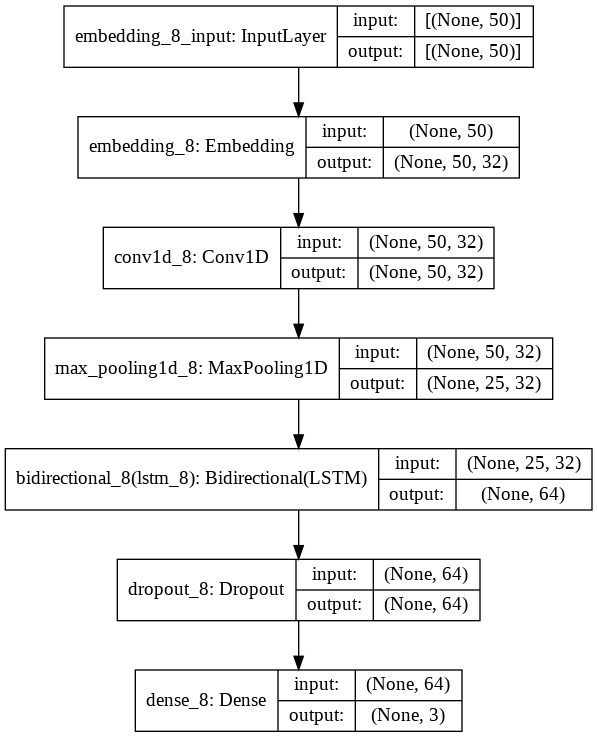

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 96s 53ms/step - loss: 1.1102 - accuracy: 0.3886 - precision_6: 0.4008 - recall_6: 0.0681 - val_loss: 1.0847 - val_accuracy: 0.4153 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/20
1710/1710 [==============================] - 88s 52ms/step - loss: 1.1120 - accuracy: 0.3794 - precision_6: 0.3986 - recall_6: 0.0748 - val_loss: 1.0873 - val_accuracy: 0.4155 - val_precision_6: 0.9091 - val_recall_6: 2.7423e-04
Epoch 3/20
1710/1710 [==============================] - 88s 52ms/step - loss: 1.1060 - accuracy: 0.3818 - precision_6: 0.4029 - recall_6: 0.0593 - val_loss: 1.0828 - val_accuracy: 0.4153 - val_precision_6: 0.6667 - val_recall_6: 5.4846e-05
Epoch 4/20
1710/1710 [==============================] - 89s 52ms/step - loss: 1.1111 - accuracy: 0.3802 - precision_6: 0.3988 - recall_6: 0.0696 - val_loss: 1.0846 - val_accuracy: 0.4155 - val_precision_6: 0.9091 - val_recall_6: 2.7423e-04
Epoch 5/20
1710/1710 [==============

## Custom SGD

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

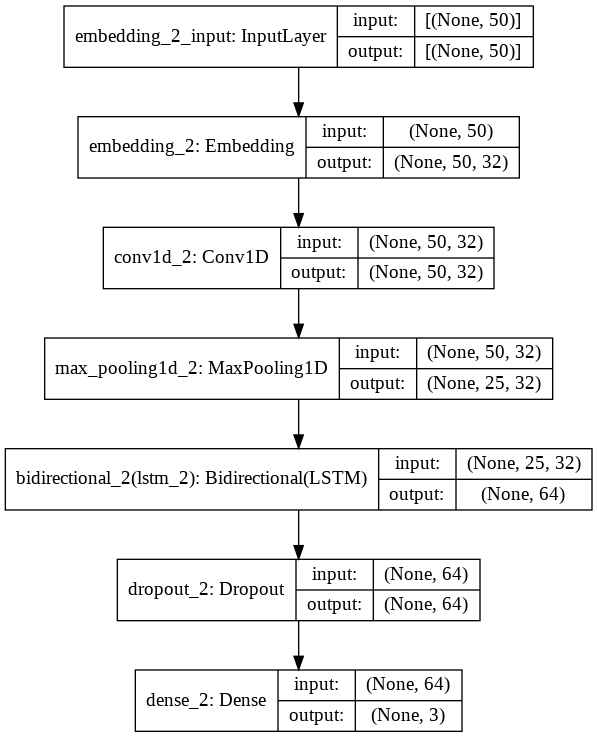

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 227s 130ms/step - loss: 0.9906 - accuracy: 0.5048 - precision_2: 0.5826 - recall_2: 0.2342 - val_loss: 0.9383 - val_accuracy: 0.5546 - val_precision_2: 0.6230 - val_recall_2: 0.3580
Epoch 2/20
1710/1710 [==============================] - 170s 99ms/step - loss: 0.8677 - accuracy: 0.5970 - precision_2: 0.6539 - recall_2: 0.4399 - val_loss: 0.7819 - val_accuracy: 0.6283 - val_precision_2: 0.6635 - val_recall_2: 0.5701
Epoch 3/20
1710/1710 [==============================] - 148s 87ms/step - loss: 0.7336 - accuracy: 0.6723 - precision_2: 0.7073 - recall_2: 0.6080 - val_loss: 0.6535 - val_accuracy: 0.7212 - val_precision_2: 0.7553 - val_recall_2: 0.6727
Epoch 4/20
1710/1710 [==============================] - 186s 109ms/step - loss: 0.5931 - accuracy: 0.7564 - precision_2: 0.7849 - recall_2: 0.7183 - val_loss: 0.5095 - val_accuracy: 0.8021 - val_precision_2: 0.8258 - val_recall_2: 0.7787
Epoch 5/20
1710/1710 [============================

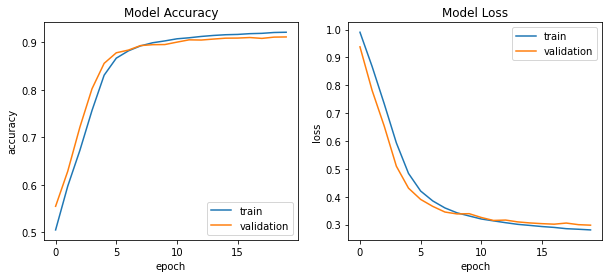

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9060
Precision : 0.9102
Recall    : 0.9019
F1 Score  : 0.9060


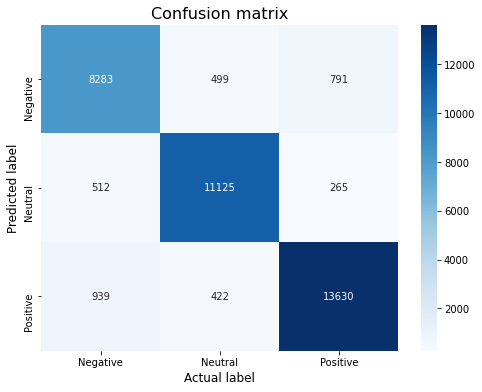

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


## Batch size 32

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
__________________________________________________

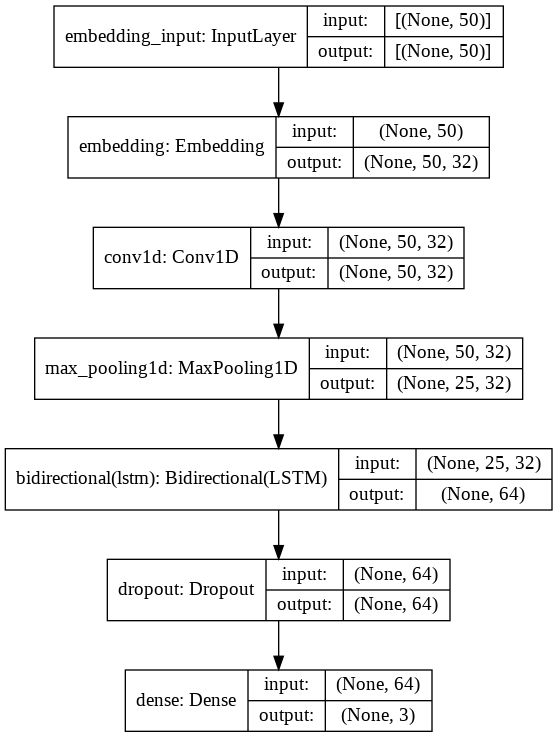

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 60s 33ms/step - loss: 1.0038 - accuracy: 0.4945 - precision_1: 0.5749 - recall_1: 0.2105 - val_loss: 0.9730 - val_accuracy: 0.5330 - val_precision_1: 0.6009 - val_recall_1: 0.3171
Epoch 2/20
1710/1710 [==============================] - 55s 32ms/step - loss: 0.7273 - accuracy: 0.6913 - precision_1: 0.7540 - recall_1: 0.5903 - val_loss: 0.5394 - val_accuracy: 0.8029 - val_precision_1: 0.8173 - val_recall_1: 0.7849
Epoch 3/20
1710/1710 [==============================] - 55s 32ms/step - loss: 0.3583 - accuracy: 0.8906 - precision_1: 0.8969 - recall_1: 0.8827 - val_loss: 0.2923 - val_accuracy: 0.9113 - val_precision_1: 0.9154 - val_recall_1: 0.9070
Epoch 4/20
1710/1710 [==============================] - 55s 32ms/step - loss: 0.2983 - accuracy: 0.9127 - precision_1: 0.9167 - recall_1: 0.9081 - val_loss: 0.2703 - val_accuracy: 0.9208 - val_precision_1: 0.9243 - val_recall_1: 0.9172
Epoch 5/20
1710/1710 [==============================] - 

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
3419/3419 [==============================] - 267s 77ms/step - loss: 0.9025 - accuracy: 0.5712 - precision_1: 0.6462 - recall_1: 0.3877 - val_loss: 0.5415 - val_accuracy: 0.8137 - val_precision_1: 0.8332 - val_recall_1: 0.7853
Epoch 2/20
3419/3419 [==============================] - 250s 73ms/step - loss: 0.3824 - accuracy: 0.8781 - precision_1: 0.8865 - recall_1: 0.8670 - val_loss: 0.2941 - val_accuracy: 0.9093 - val_precision_1: 0.9123 - val_recall_1: 0.9062
Epoch 3/20
3419/3419 [==============================] - 285s 83ms/step - loss: 0.2909 - accuracy: 0.9120 - precision_1: 0.9178 - recall_1: 0.9065 - val_loss: 0.2592 - val_accuracy: 0.9204 - val_precision_1: 0.9240 - val_recall_1: 0.9171
Epoch 4/20
3419/3419 [==============================] - 256s 75ms/step - loss: 0.2666 - accuracy: 0.9198 - precision_1: 0.9260 - recall_1: 0.9134 - val_loss: 0.2470 - val_accuracy: 0.9244 - val_precision_1: 0.9301 - val_recall_1: 0.9189
Epoch 5/20
3419/3419 [==============================

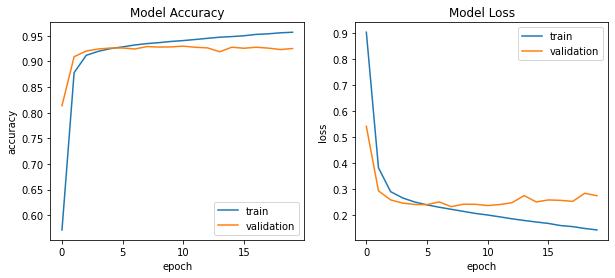

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9214
Precision : 0.9271
Recall    : 0.9161
F1 Score  : 0.9215


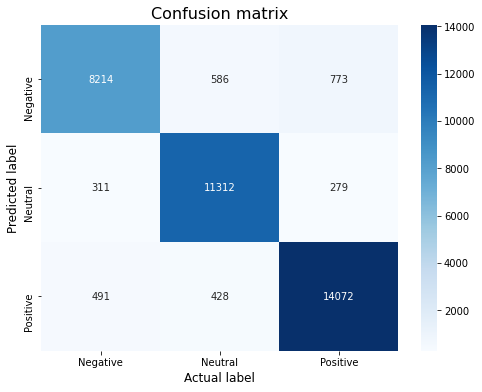

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

## Vocab Size = 100,000

In [ ]:
vocab_size = 100000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

opt_sgd = SGD(learning_rate=learning_rate)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 32)            3200000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 3,219,939
Trainable params: 3,219,939
Non-trainable params: 0
____________________________________________

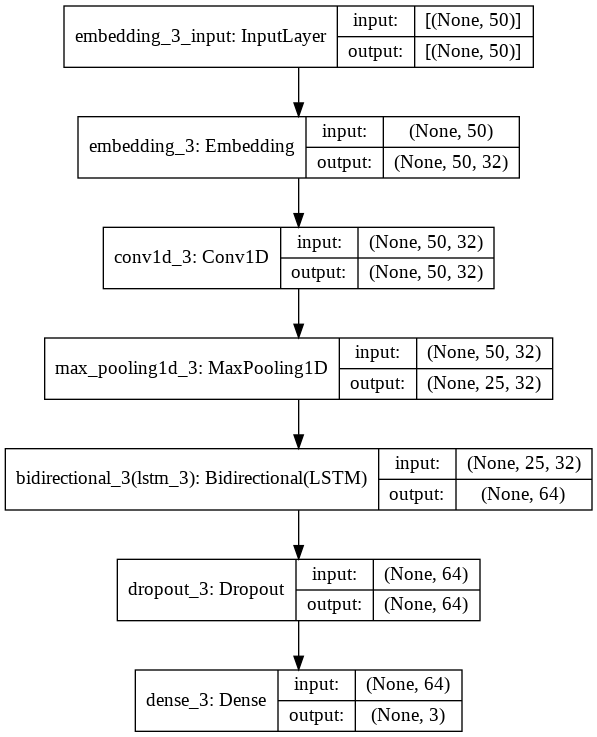

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1710/1710 [==============================] - 61s 34ms/step - loss: 1.0018 - accuracy: 0.4943 - precision_2: 0.5786 - recall_2: 0.2156 - val_loss: 0.9124 - val_accuracy: 0.5617 - val_precision_2: 0.6391 - val_recall_2: 0.3796
Epoch 2/20
1710/1710 [==============================] - 57s 33ms/step - loss: 0.6340 - accuracy: 0.7430 - precision_2: 0.7894 - recall_2: 0.6811 - val_loss: 0.4189 - val_accuracy: 0.8572 - val_precision_2: 0.8675 - val_recall_2: 0.8459
Epoch 3/20
1710/1710 [==============================] - 56s 33ms/step - loss: 0.3377 - accuracy: 0.8982 - precision_2: 0.9027 - recall_2: 0.8924 - val_loss: 0.2883 - val_accuracy: 0.9143 - val_precision_2: 0.9171 - val_recall_2: 0.9118
Epoch 4/20
1710/1710 [==============================] - 56s 33ms/step - loss: 0.2885 - accuracy: 0.9170 - precision_2: 0.9202 - recall_2: 0.9136 - val_loss: 0.2684 - val_accuracy: 0.9230 - val_precision_2: 0.9260 - val_recall_2: 0.9200
Epoch 5/20
1710/1710 [==============================] - 

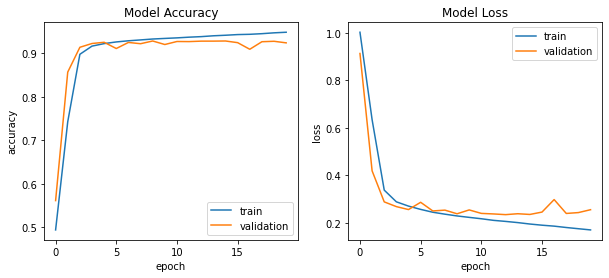

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

# Testing Results

In [ ]:
from keras.models import load_model

# Load model
model = load_model('best_model_jjsgd.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class(['"I hate when I have to call and wake people up'])

The predicted sentiment is Negative


In [ ]:
predict_class(['The food was meh'])

The predicted sentiment is Neutral


In [ ]:
predict_class(['He is a best minister malaysia ever had seen'])

The predicted sentiment is Positive
